# In space propulsion

In-space propulsion has very different requirements than launch vehicle propulsion.  In LEO, $\Delta V$ requirements are rarely more than a few hundred m/s so super-high performance is not required.  However, reliability is paramount, packing efficiency (density) is extremely important and the requirement for long term storage of propellants precludes things like cryogenics. 

## Types

A map of the primary technologies used for in-space propulsion is shown below

<img src="imgs/technologies.png">

Some observations:

* For low performance requirements gas systems (cold gas/warm gas/liquified gas) are a good choice
* For medium performance requirements monopropellants are dominant
* For high performance requirements, bipropellant or electric propulsion is required

# Technology trades
Assuming a $\Delta V$ requirement of 150 m/s, this puts us between low and medium performance.  To understand what it requires to do 150 m/s with several different propellants:

<table>
<tr><th>Technology</th><th>$I_{sp}$</th><th>Required propellant mass fraction</th></tr>
<tr><td>Cold gas</td><td>61s</td><td>22%</td></tr>
<tr><td>Warm Gas</td><td>72s</td><td>20%</td></tr>
<tr><td>Monopropellant</td><td>210s</td><td>7%</td></tr>
<tr><td>Bipropellant</td><td>210s</td><td>4%</td></tr>
<tr><td>Electric Propulsion (Hall thruster)</td><td>1500s</td><td>1%</td></tr>
</table>

Cold/warm gas systems are very difficult to get this much $\Delta V$ out of - packing 25kg of compressed nitrogen aboard a small satellite does not pass the giggle factor.

So we are left with monopropellant, bipropellant and electric propulsion.  Bipropellant systems are overkill and generally extrmely expensive.  Electric propulsion is also quite expensive but a potential option.  There are other problems with electric propulsion though.

### Electric Propulsion vs. Chemical Propulsion

While electric propulsion can be extremely high performance from a specific impulse perspective, it is also quite power hungry and extremely low thrust.

The power requirement for an electric propulsion system is simply the power in the exhaust stream with an efficiency factor:

$$P_{ep} = \frac{\dot{m}C^2}{2\eta_{electric}}$$

For many really good EP systems $\eta_{electric}$ can be as high as 70-75%.  But generally they are closer to 50% and we'll use that here because it makes the math simple.  Also, since $T = \dot{m}C$ and $C = I_{sp} g_0$, we can rewrite this as

$$P_{ep} \approx T \times I_{sp}g_0$$

Suppose we plan to use 50 m/s $\Delta V$ over the initial 1 month commissioning to move the satellites orbit. We can say that we need an average acceleration of $$\frac{50 \text{m/s}}{1 \text{mo}} = 2\times 10^{-5} \text{m/s}^2$$

Assuming that propellant is a very small percentage of spacecraft mass (which it is for EP), we can then look at the thrust, and thus average power requirement to achieve this.  In general we won't be able to thrust continuoulsy because it would require us holding the spacecraft attitude continuosly.  So instead let's assume that we are only thrusting 25% of the time, making the thrust requirement 4 times higher.

/Users/jonny/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Populating the interactive namespace from numpy and matplotlib


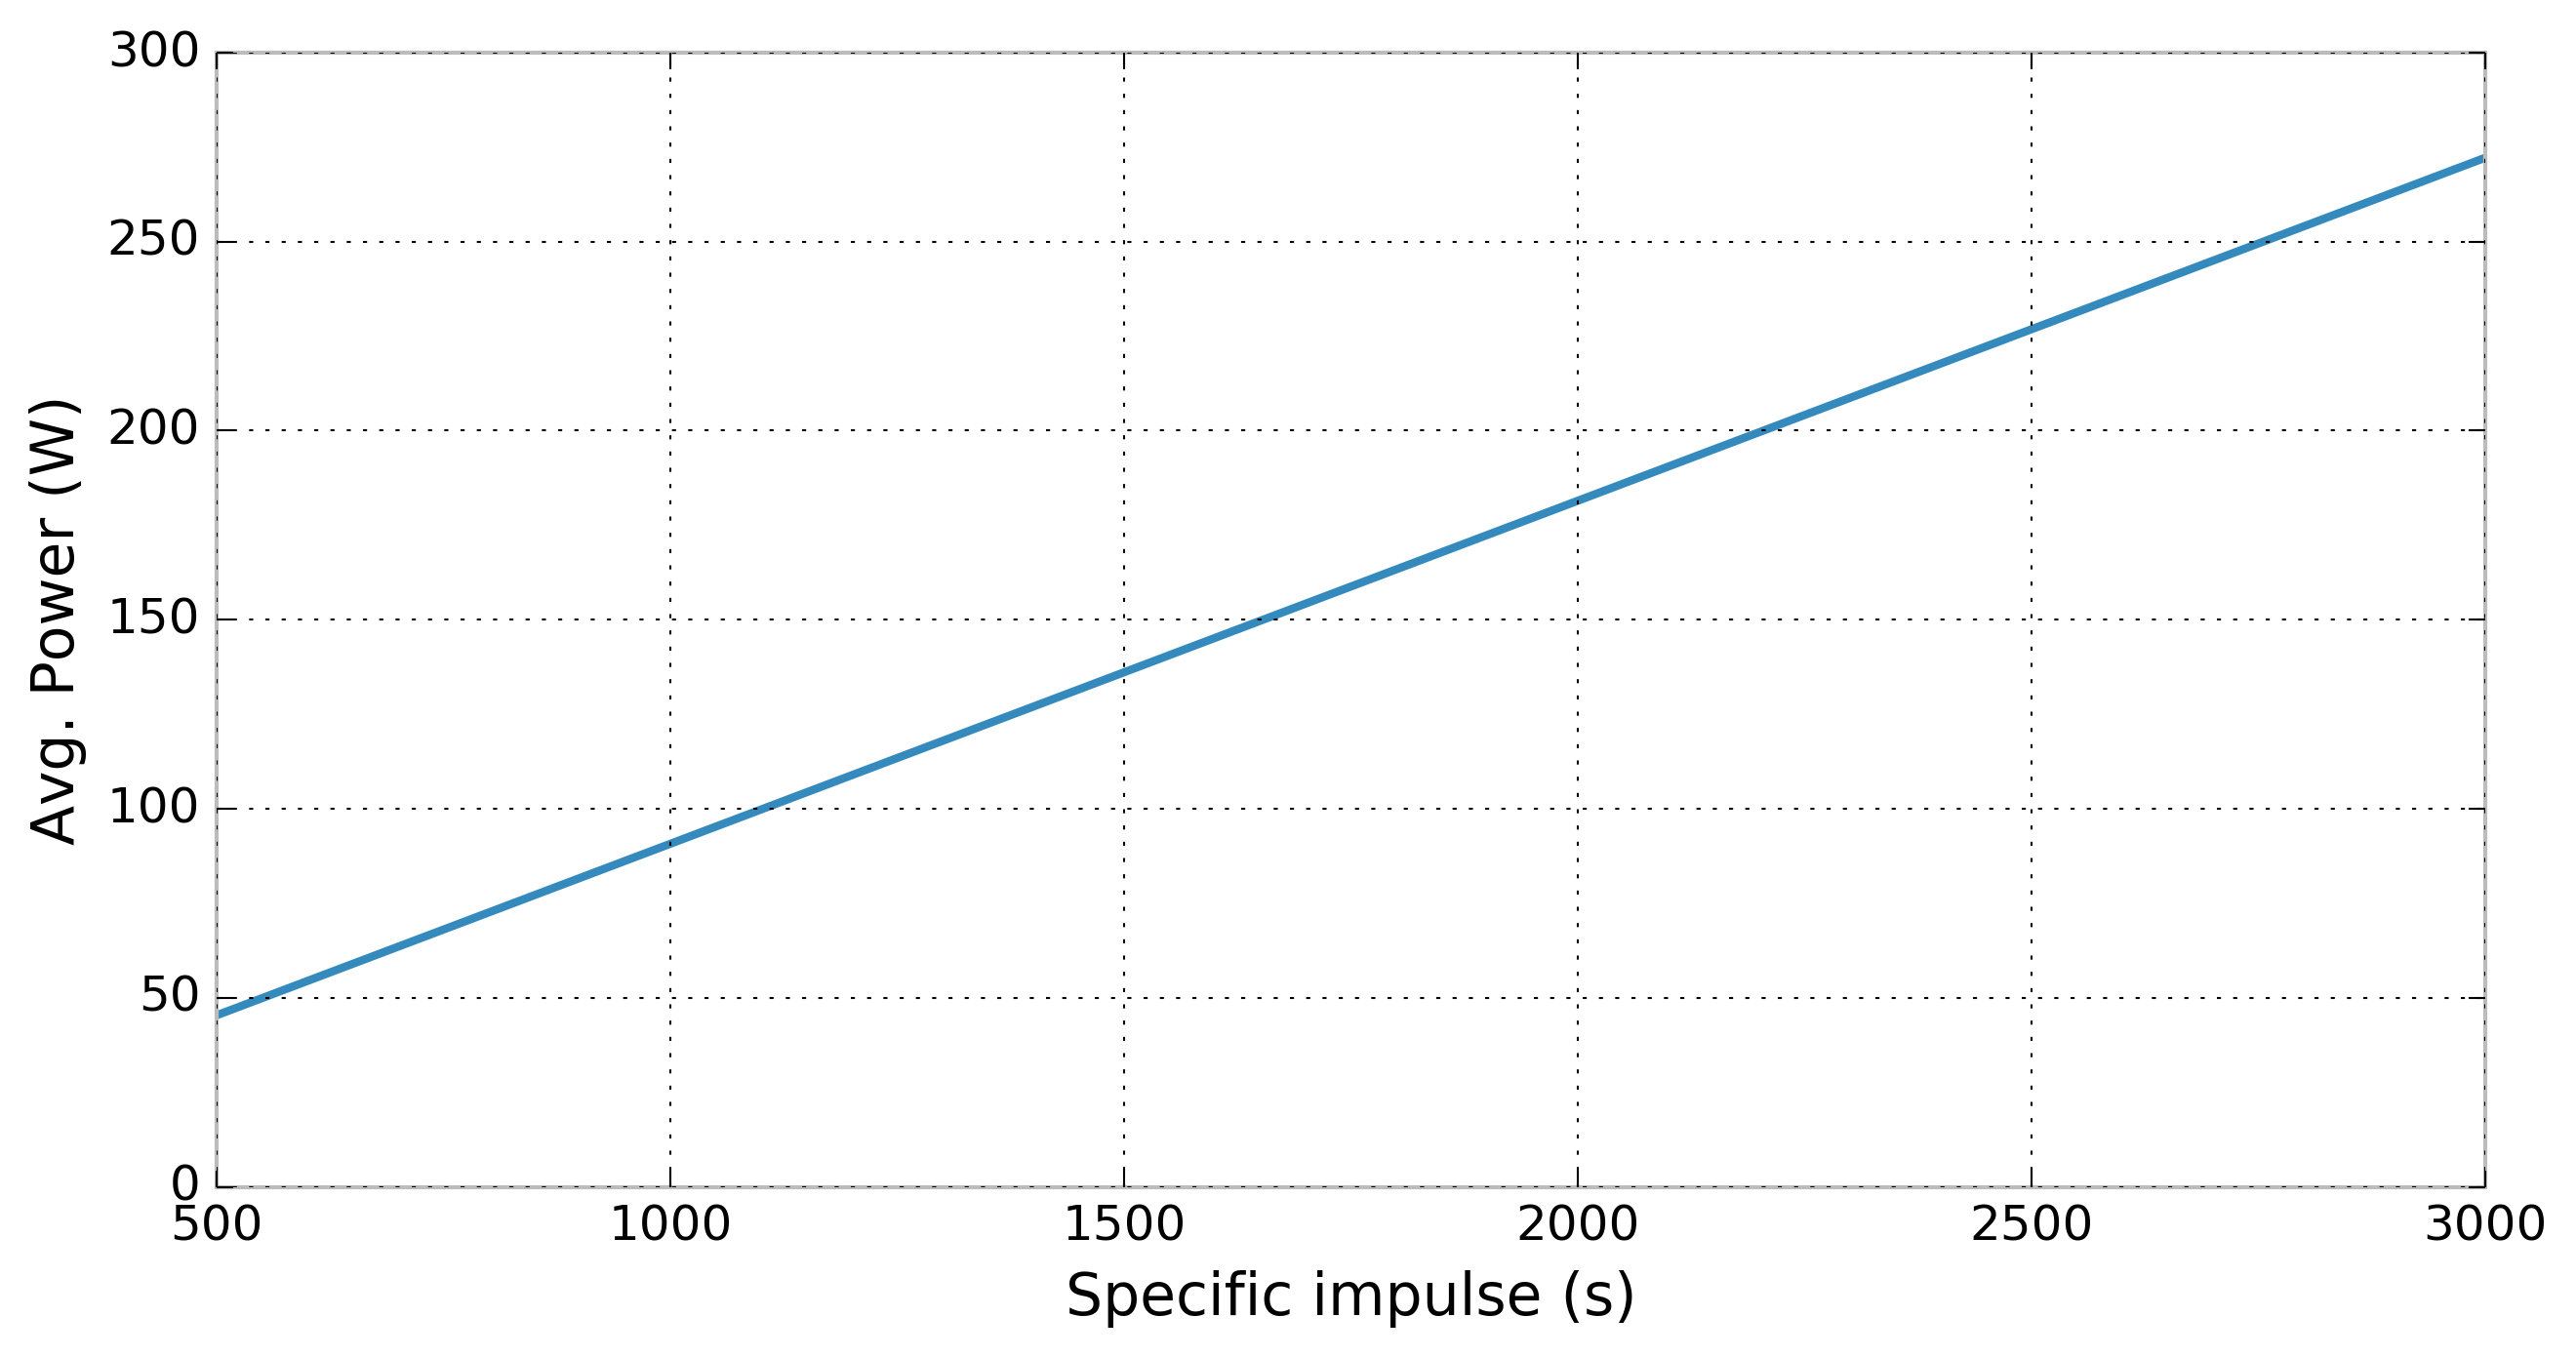

In [2]:
%pylab inline
rcParams['figure.figsize'] = (10,5)
Isp = np.linspace(500, 3000)
g0 = 9.8
a = 50. / 1. / 30. / 24. / 60. / 60.
DC = 0.25
m = 120.
T = a*m / DC
P = T * Isp * g0
plt.plot(Isp, P)
plt.xlabel('Specific impulse (s)')
plt.ylabel('Avg. Power (W)')

At $I_sp$ = 1500 s (typical for Hall Thrusters), this constitutes almost the full power output of our solar arrays!

The moral of the story is that unless you are able to take extremely low accelerations over very long periods of time, and hold the spacecraft attitude to accommodate, the power requirements for EP are really difficult to fit in a bus like ours.


## Monopropellant In-Space Propulsion

So we choose monopropellant for our system because

* It offers good performance (medium $I_{sp}$, high density)
* The power requirements are not too bad
* It is relatively simple and inexpensive from a system perspective

It is worth interjecting a John Clark (no, different one) quote here:

> The idea was that of a monopropellant.  A monopropellant is a liquid which contains in itself both the fuel and the oxidizer, either as a single molecule such as methyl nitrate, CH3HO3 in which the oxygens can burn the carbons and the hydrogens, or as a mixture of a fuel and an oxidizer, such as a solution of benzene in N2O4.  On paper, the idea looks attractive.  You have only one fluid to inject in the chamber, which simplifies your plumbing, your mixture ratio is built in and stays where you want it, you don't have to worry about building an injector which will mix the fuel and oxidizer properly and things are simpler all around.  BUT!  Any intimate mixture of a fuel and an oxidizer is a potential explosive, and a molecule with one reducing (fuel) end and one oxidizing end, separated by a pair of firmly crossed fingers, is an invitation to disaster.

> John Clark, Ignition!

### Hydrazine 
The classic monopropellant is hydrazine:

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Hydrazin.svg/93px-Hydrazin.svg.png">

Hydrazine is extremely attractive for a lot of reasons.  It is:

* A widely-used industrial chemical.  Over 120,000 tons of hydrazine hydrate are produced per year
* A liquid and stable enough at room temperature
* A very high performance fuel in bipropellants and is hypergolic with N2O4 and Nitric Acid
* A medium-performance monopropellant when decomposed over a catalyst
* Relatively dense - S.G. = 1.0

Additionally much of the early strategic missile (and therefore space launch vehicle) work was done with hydrazine and nitrogen tetroxide (N2O4) so it was very commonly handled as a propellant, on-board launch vehicles already and readily available at launch bases. In the 1970's Shell developed a catalyst (Shell 405) that will initiate decomposition of hydrazine at room temperatures enabling a huge range of robust monopropellant thrusters.

For all of these reasons hydrazine has been the defacto standard for in-space monopropellant systems.  However hydrazine is also extrmely toxic, carcinogenic and, in its anhydrous form, fairly unstable. It's freezing point is over 0˚C which makes environmental control difficult.  With careful handling, all of these can be managed but over time handling logistics have become more costly and difficult as exposure and safety regulations were made more stringent.

### After hydrazine

Starting in the 1990's several groups started actively seeking a suitable "green" replacement for hydrazine.  Much of this work was on energetic ionic monopropellants.  These propellants consist of an energetic oxidizing ionic salt in an aqueous soluation with reducing agents (fuels) such as methanol, ammonia, glycerol or more exotic ionic fuels such as tris(ethanol)ammonium nitrate (TEAN), or hydrazinium azide (HA) [for more detail see: http://cdn.intechopen.com/pdfs-wm/20222.pdf].  The ionic oxidizing salts are compounds like ammonium nitrate (AN):

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Ammonium-nitrate-2D.png/320px-Ammonium-nitrate-2D.png">

which have a reducing cation (in this case ammonium) coupled with an oxidizing anion (nitrate).  Salts with more oxidizing potential (like AN) are by definition considered oxidizing ionic salts.  Because they have both oxidizing and reducing components they are also monopropellants themselves and therefore capable of explosive decomposition (see Oklahoma City bombing).  But many of them (including AN) are actually quite stable and difficult to decompose.

Ammonium dinitramide (ADN) is the particular ionic salt used in the ECAPs propellant.  It is an ammonium cation combined with the dinatramide anion

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/0/06/Ammonium_dinitramide.png/320px-Ammonium_dinitramide.png">

ADN has an interesting history - it was originally synthesized by the Russians for use as an oxidizer in solid rocket propellants.  It has quite good performance in this role and is especially attractive for weapons in that it produces a smokeless exhaust.  However it is quite hygroscopic (moisture absorbing) and when this was discovered, it was largely abandoned for use in solids.  It was re-discovered in the west by SRI in the 1990's at which point it became known that it had been earlier developed by the Russians.

Another example is Hydroxyl Ammonium Nitrage (HAN) which the Air Force has been pushing for 10+ years.  Very similar ionic salt:

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/c/c0/Hydroxylammonium-nitrate-2D.png/320px-Hydroxylammonium-nitrate-2D.png">

HAN is more energetic than ADN, meaning higher $I_{sp}$, but it is also more unstable and has a higher combustion temperature in monopropellant formulations.  The higher temperatures make catalyst design very difficult.  HAN-based monopropellants are not yet operational.

ADN's hygroscopic nature is no problem when when mixed with water, methanol and ammonia in ECAPS' LMP-103s propellant.  The solutions is a moderately high performance monopropellant which decomposes over a catalyst bed to produce hot gasses for propulsion.  LMP-103s, while still toxic (due to methanol and ammonia) is much safer to handle than hydrazine.  It is generally similar to household cleaning products in regards to handling.

The formulation, packaged appropriately, has also been designated a UN Class 1.4s explosive (http://en.wikipedia.org/wiki/Explosives_shipping_classification_system).  Class 1.4s is a very benign classification which is, among other things, allowed for transport on passenger vehicles (planes, boats, cars).  This makes shipping logistics quite straightforward compared with many other propellants. 

## ECAPs LMP-103S

Some publically available data for LMP-103S propellant:

In [12]:
# ADN Properties
M_ADN = 4 * 1.008 + 4 * 14.007 + 4 * 15.999  #g/mol
delHf0_ADN = -148e3   #j/mol - ref http://www.tandfonline.com/doi/abs/10.1080/07370650008216116#.VGZ6qbxdWNM
delHf0_ADN_mass = delHf0_ADN / M_ADN

#LMP-103s Properties
mf_ADN = .6
mf_methanol = .15
mf_ammonia = .04
mf_h2o = 1. - mf_ADN - mf_methanol - mf_ammonia
rho_ADN = 1.24        #g/cc

# Thruster Properties
AR = 150.

# System performance aspects

Here we will go through some of the aspects of performance that are quite specific to our module.

## Pressure, flowrate, thrust and $I_{sp}$

It turns out there is tightly coupled relationship between propellant mass flowrate, chamber pressure, tank pressure, combustion temperature, specific impulse and thrust.  ECAPS provides empirical models of thrust and specific impulse as a function of propellant feed pressure which is very useful.  In order to ground these models and allow us to derive other models, let's look at how these factors are related.

### Pressure and Flowrate

The standard incompressivle flow rate equation is

$$\dot{m} = K_f A_f \sqrt{2 \rho \Delta P}$$

where in the case of a thruster, we can say $\Delta P = P_f - P_c$, $K_f$ is a flow coefficient (between 0 and 1) and $A_f$ is the flow area.  This works well for non-cavitating (pure liquid), inviscid, constant density flow.  Because of the large thermal gradients (changing density), small geometry (boundary layer important) and large pressure gradients, this is not strictly applicable.  In reality the flowrate is likely in a non-equillibrium two-phase regime which is incredibly difficult to predict analytically.  In this regime, it behaves much more like choked compressible flow, in which case you one would expect the flowrate to depend **only** on the upstream pressure, $P_f$.  Therefore, we expect flowrate to roughly follow the relationship

$$\dot{m} \propto P_f^n$$

where $n$ is regime dependent but varies between 0.5 and 1.  From the definition of thrust equation, we can also say:

$$\dot{m} = \frac{T}{I_{sp}g_0}$$

And from ECAPS we have functions for both $I_{sp}(P_f)$ and $T(P_f)$.   It turns out that if we choose $n=0.75$ and pick an adjustable constant $K_1 = K_f \times A_f$ to match to their data, we can get almost perfect agreement with the follow semi-empirical flow model:

$$\dot{m} = K_1  P_f^{0.75}$$

where we select $K_1 = 4.65 \times 10^{-5}$:

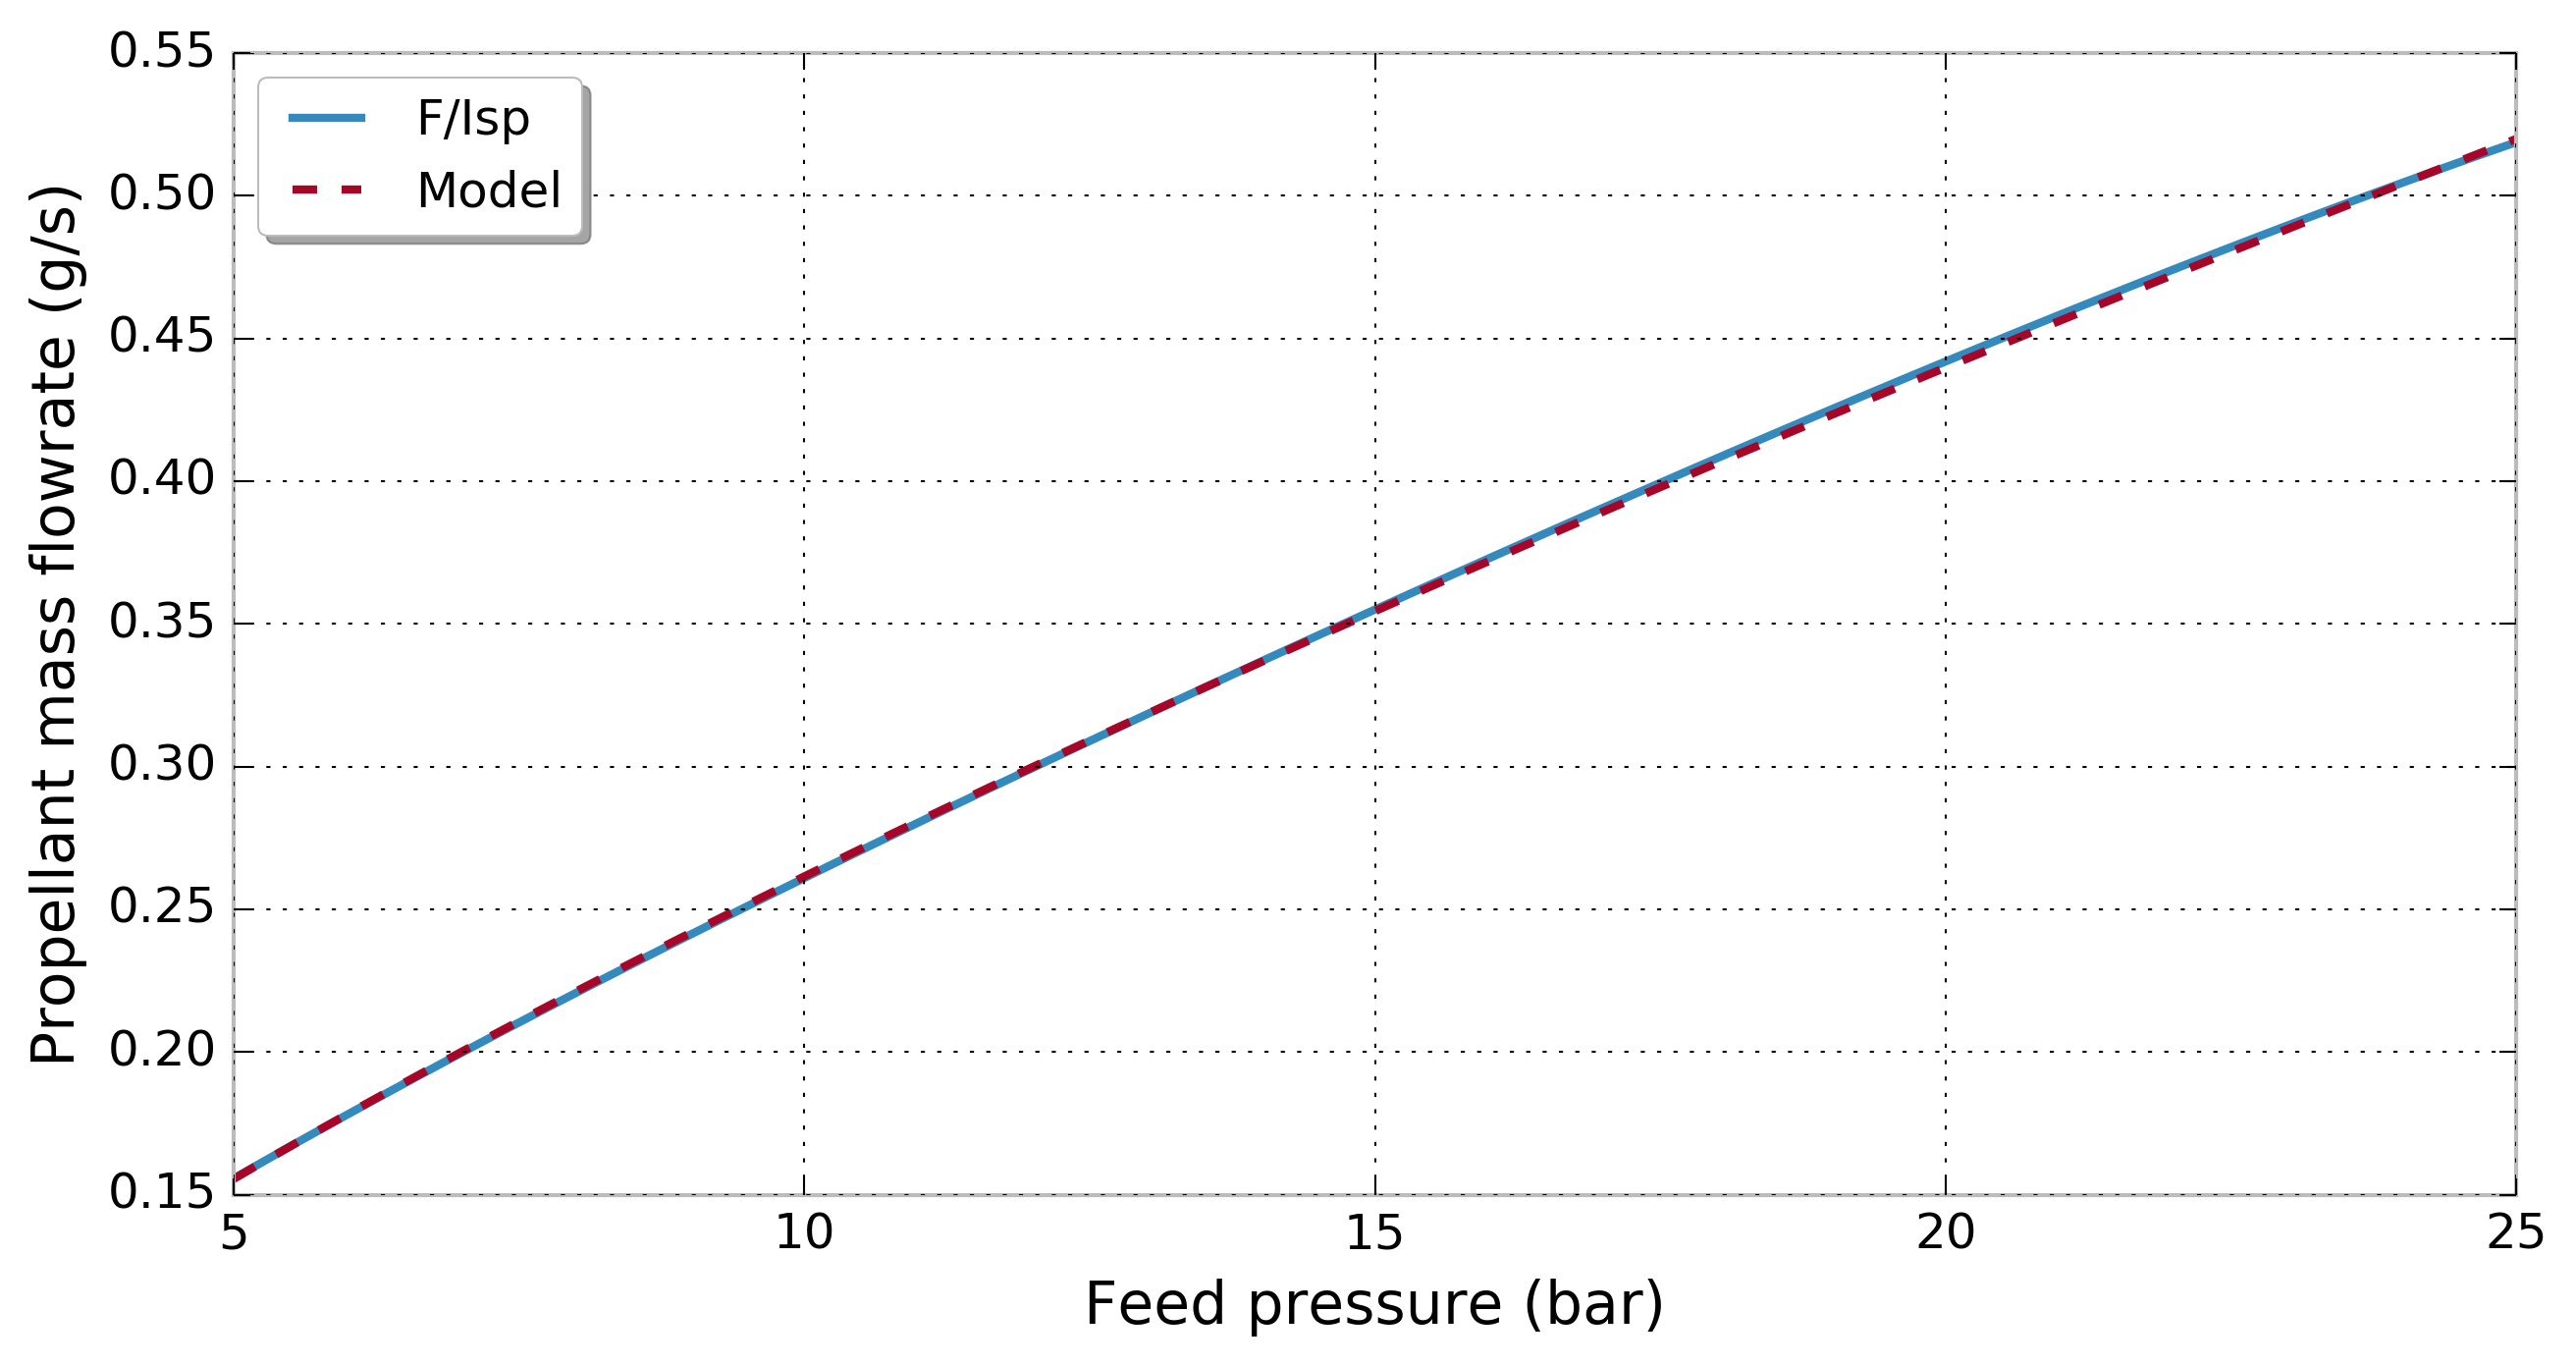

In [4]:
k1 = 4.65e-5
k2 = .75

def mdot_f(Pf):
    return k1*Pf**k2

Pfeed = np.linspace(5, 25, 100)

mdot = Fvac(Pfeed) / C(Pfeed)    #kg / s

mdot_theory = mdot_f(Pfeed)      #kg / s

plt.plot(Pfeed, mdot * 1e3, label='F/Isp')
plt.plot(Pfeed, mdot_theory * 1e3, '--', label='Model')
plt.xlabel('Feed pressure (bar)')
plt.ylabel('Propellant mass flowrate (g/s)')
plt.legend(loc='best')

### Specific Impulse

Specific Impulse, $I_{sp}$ is dependent on feed pressure in a complex way.  Because 

$$I_{sp} \propto c^* \propto \sqrt{T_c}$$ we must know something about the dependence between feed pressure and combustion temperature.

Writing out the quasi-steady state (zero thermal mass gas) combustion chamber gas-side energy balance:

$$\dot{Q}_{combustion} - \dot{Q}_{wall} = \dot{m}(h_c - h_0) = \dot{m}\int_{T_0}^{T_c} C_p(T)dT$$

And the combustion chamber wall energy balance:

$$\dot{Q}_{wall} - \sigma \epsilon A_{w} (T_{w}^4 - T_\infty^4) = \frac{dT_{w}}{dt}m_{w}C_{w}$$

where

$$\dot{Q}_{combustion} = \dot{m}\Delta h_{rxn}$$

when thruster is on and $\dot{Q}_{combustion} = 0$ when it is not.

$$\dot{Q}_{wall} = hA_{w}\left(T_c-T_{w}\right)$$

and the $w$ subscript indicates combustion chamber wall temperature.

We will define $\overline{C}_p \equiv \frac{\int_{T_0}^{T_c} C_p(T)dT}{T_c-T_0}$ such that

$$\dot{m}\Delta h_{rxn} - hA_{w}\left(T_c-T_{w}\right) = \dot{m}\left(T_c - T_0\right)\overline{C}_p$$

and

$$hA_{w}\left(T_c-T_{w}\right) - \sigma \epsilon A_{w} (T_{w}^4 - T_\infty^4) = \dot{T}_{w}m_{w}C_{w}(T_{w})$$

combining terms, we get:

$$\dot{T}_{w} = \frac{hA_{w}\left(T_c-T_{w}\right) - \sigma \epsilon A_{w} (T_{w}^4 - T_\infty^4)}{m_{w}C_{w}(T_{w})}$$

and 

$$T_c = \frac{\dot{m}\Delta h_{rxn} + hA_{w}T_{w} + \dot{m}\overline{C}_p T_0}{\dot{m}\overline{C}_p + hA_{w}}$$

This is not non-linear in $T_c$ so not solvable in closed-form.  However, we can solve it numerically.  Recasting

Because the combustion reaction is quite complex, $\Delta h_{rxn}$ really must be calculated with a chemical equillibrium solver such as *cpropep*. This will also provide us with a number of other useful parameters associated with the combustion reaction.

Running *cpropep* (http://sourceforge.net/projects/rocketworkbench/files/rocketworkbench/1.0/) gives the following output:

    Shifting equilibrium performance evaluation

    Propellant composition
    Code  Name                                mol    Mass (g)  Composition
    1035  Ammonium Dinitramide (ADN)          0.4837 60.0000   4H  4O  4N  
    579   METHANOL                            0.4681 15.0000   4H  1C  1O  
    55    AMMONIA (GASEOUS)                   0.2349 4.0000   3H  1N  
    976   WATER                               1.1657 21.0000   2H  1O  
    Density :  2.506 g/cm^3
    4 different elements
    H  O  N  C  
    Total mass:  100.000000 g
    Enthalpy  : -5276.54 kJ/kg

    148 possible gazeous species
    3 possible condensed species

                           CHAMBER      THROAT        EXIT
    Pressure (atm)   :       6.805       3.801       0.003
    Temperature (K)  :    1778.313    1596.694     441.331
    H (kJ/kg)        :   -5276.540   -5682.743   -8243.759
    U (kJ/kg)        :   -6012.067   -6343.138   -8414.765
    G (kJ/kg)        :  -26837.405  -25041.600  -13594.601
    S (kJ/(kg)(K)    :      12.124      12.124      12.124
    M (g/mol)        :      20.102      20.103      21.458
    (dLnV/dLnP)t     :    -1.00002    -1.00001    -1.00785
    (dLnV/dLnT)p     :     1.00043     1.00011     1.18369
    Cp (kJ/(kg)(K))  :     2.26352     2.21069     3.25380
    Cv (kJ/(kg)(K))  :     1.84956     1.79700     2.71512
    Cp/Cv            :     1.22382     1.23021     1.19840
    Gamma            :     1.22379     1.23021     1.18907
    Vson (m/s)       :   948.75358   901.34378   450.92949

    Ae/At            :                 1.00000   150.00002
    A/dotm (m/s/atm) :               192.77932  27090.4599
    C* (m/s)         :              1311.78545  1311.78545
    Cf               :                 0.68711     1.85706
    Ivac (m/s)       :              1634.02133  2506.26754
    Isp (m/s)        :               901.34378  2436.07021
    Isp/g (s)        :                91.91149   248.41003

    Molar fractions

    CO                    4.0960e-02  3.6859e-02  6.9302e-06
    CO2                   5.3147e-02  5.7247e-02  6.2526e-02
    H                     3.8970e-05  9.3486e-06  0.0000e+00
    HCN                   1.6454e-08  0.0000e+00  0.0000e+00
    HNCO                  2.6065e-08  1.3963e-08  0.0000e+00
    H2                    1.1771e-01  1.2182e-01  3.2373e-02
    HCHO,formaldehy       1.4075e-08  0.0000e+00  0.0000e+00
    HCOOH                 6.8816e-08  3.7901e-08  0.0000e+00
    H2O                   5.7007e-01  5.6598e-01  5.9228e-01
    NH3                   4.0000e-06  3.6229e-06  1.1753e-05
    NO                    3.5810e-07  3.3038e-08  0.0000e+00
    N2                    2.1806e-01  2.1806e-01  2.1805e-01
    OH                    1.1821e-05  1.6813e-06  0.0000e+00
    
A quick note on the output:  notice that it predicts an $I_{sp}$ of 248 s which is substantially higher than ECAPS reported 225 s.  This is due to combustion inefficiency not accounted for as well as radiative heat loss from the thruster.  We will account for radiative heat loss directly and accomodate combustion efficiency with an empirical factor, $\eta_c$ that we will adjust in order to produce a steady-state $I_{sp}$ of 225 s.

*cpropep* provides gas enthalpy, $H$ directly at various states but it is somewhat difficult to use because it is defined at a particular equillibrium temperature and gas composition.  A more useful thing to look at is the equillibrium chamber temperature and mean gas specific heat $\overline{C}_p$ under the definition $\Delta h_{rxn} \equiv \eta_c ( T_c^i - T_0)\overline{C}_p$.  $T_c^i$ is the ideal combustion chamber gas temperature as predicted by *cpropep*.  

Other useful parameters from the chemical equillibrium solver are:

$$T_c^i = 1778 \: \text{K}$$
$$\overline{\gamma} = 1.206$$
$$c^*_{ideal} = 1311 \: \text{m/s}$$
$$\overline{M}_w = 20.4 \: \text{g/mol}$$
$$\overline{C}_p = 2.759 \: \text{kJ/kg-K}$$
$$c_f = 1.857$$

A sanity check using the $c^*$ equation gives the following:

$$c^*_{ideal} = \sqrt{\frac{RuT_c^i}{\gamma M_{w} \left(\frac{2}{\gamma+1}\right)^{\frac{\gamma+1}{\gamma-1}}}} = 1310 \: \text{m/s}$$

A very good result!

We also define a temperature-dependent function for $C_p$ because variability with temperature does affect results, especially at very low mass flow rates.  We derived it from multiple runs of cpropep with different equillibrium temperatures.

In [5]:
Ru = 8314       # J/kg-K
Tci = 1778      # K
gamma = 1.206
cstari = 1311    # m/s
cf = 1.857
Mw = 20.4       # g/mol
Cp = 2.759e3    # J/kg-K - at 1780 K

def cstar_f(Tc, gamma, Mw):
    return np.sqrt(Ru * Tc / (gamma * Mw * (2. / (gamma + 1.))**((gamma + 1.) / (gamma - 1.))))

print 'Computed c* = %.1f m/s' % cstar_f(Tci, gamma, Mw)

Computed c* = 1310.2 m/s


We now have all the major parameters needed to solve the the above combustion temperature differential equation numerically except for the radiative properties of the combustion chamber.  We will estimate the radiative area, emissivity and chamber thermal mass below.

In [6]:
from scipy.integrate import ode

sigma = 5.67e-8      # W / m^2-K^4
g0 = 9.8             # m / s^2

dc = 0.5 * .0254     # m
lc = 2.5 * .0254     # m
Ac = pi * dc * lc
h = 500               # W/m^2-K
mw = .01              # kg
Cw = 137.             # J/kg-K
Tinf = 3.             # K
T0 = 273.             # K

epsilon_f = lambda T: 0.9 - T / 3000.

eta_c = 0.92

def temp_dyn(mdot, Tw_i=573., DC=1., eta_c=0.9, rate=1., steps_per_period=100):
    del_h_rxn = eta_c * Cp * (Tci - 273)
    tv = [0.0]
    Tw = [Tw_i]
    mdot_v = [mdot]
    tf = rate * len(DC)
    
    def Tc_f(Tw, mdot_v):
        return (mdot_v * del_h_rxn + h*Ac*Tw + mdot_v * Cp * T0)/(mdot_v * Cp + h*Ac)
    
    def Tw_dot(t, Tw):
        '''
        Dynamic equation for chamber temperature
        '''
        Tc = Tc_f(Tw, on*mdot)
        dTw_dt = (h*Ac * (Tc-Tw) - sigma * epsilon_f(Tw) * Ac * (Tw**4 - Tinf**4)) / (mw*Cw)
        return dTw_dt
    
    r = ode(Tw_dot).set_integrator('dopri5', atol=1e-3, rtol=1e-3, max_step=0.1, verbosity=1)
    r.set_initial_value(Tw_i, 0.0)
    i = 0
    dt = 1. / rate / steps_per_period
    while r.successful() and r.t < tf and i < len(DC):
        tper_0 = r.t
        on = 1.0
        for j in xrange(steps_per_period):
            r.integrate(r.t + dt)
            tv.append(r.t)
            Tw.append(r.y)
            mdot_v.append(on*mdot)
            if (r.t - tper_0) >= (DC[i] / rate):
                on = 0.0
        i = i+1
    
    Tc = Tc_f(np.array(Tw), np.array(mdot_v))
    return np.array(tv), np.array(Tw), Tc, np.array(mdot_v)

Reduction in Isp - 98.577


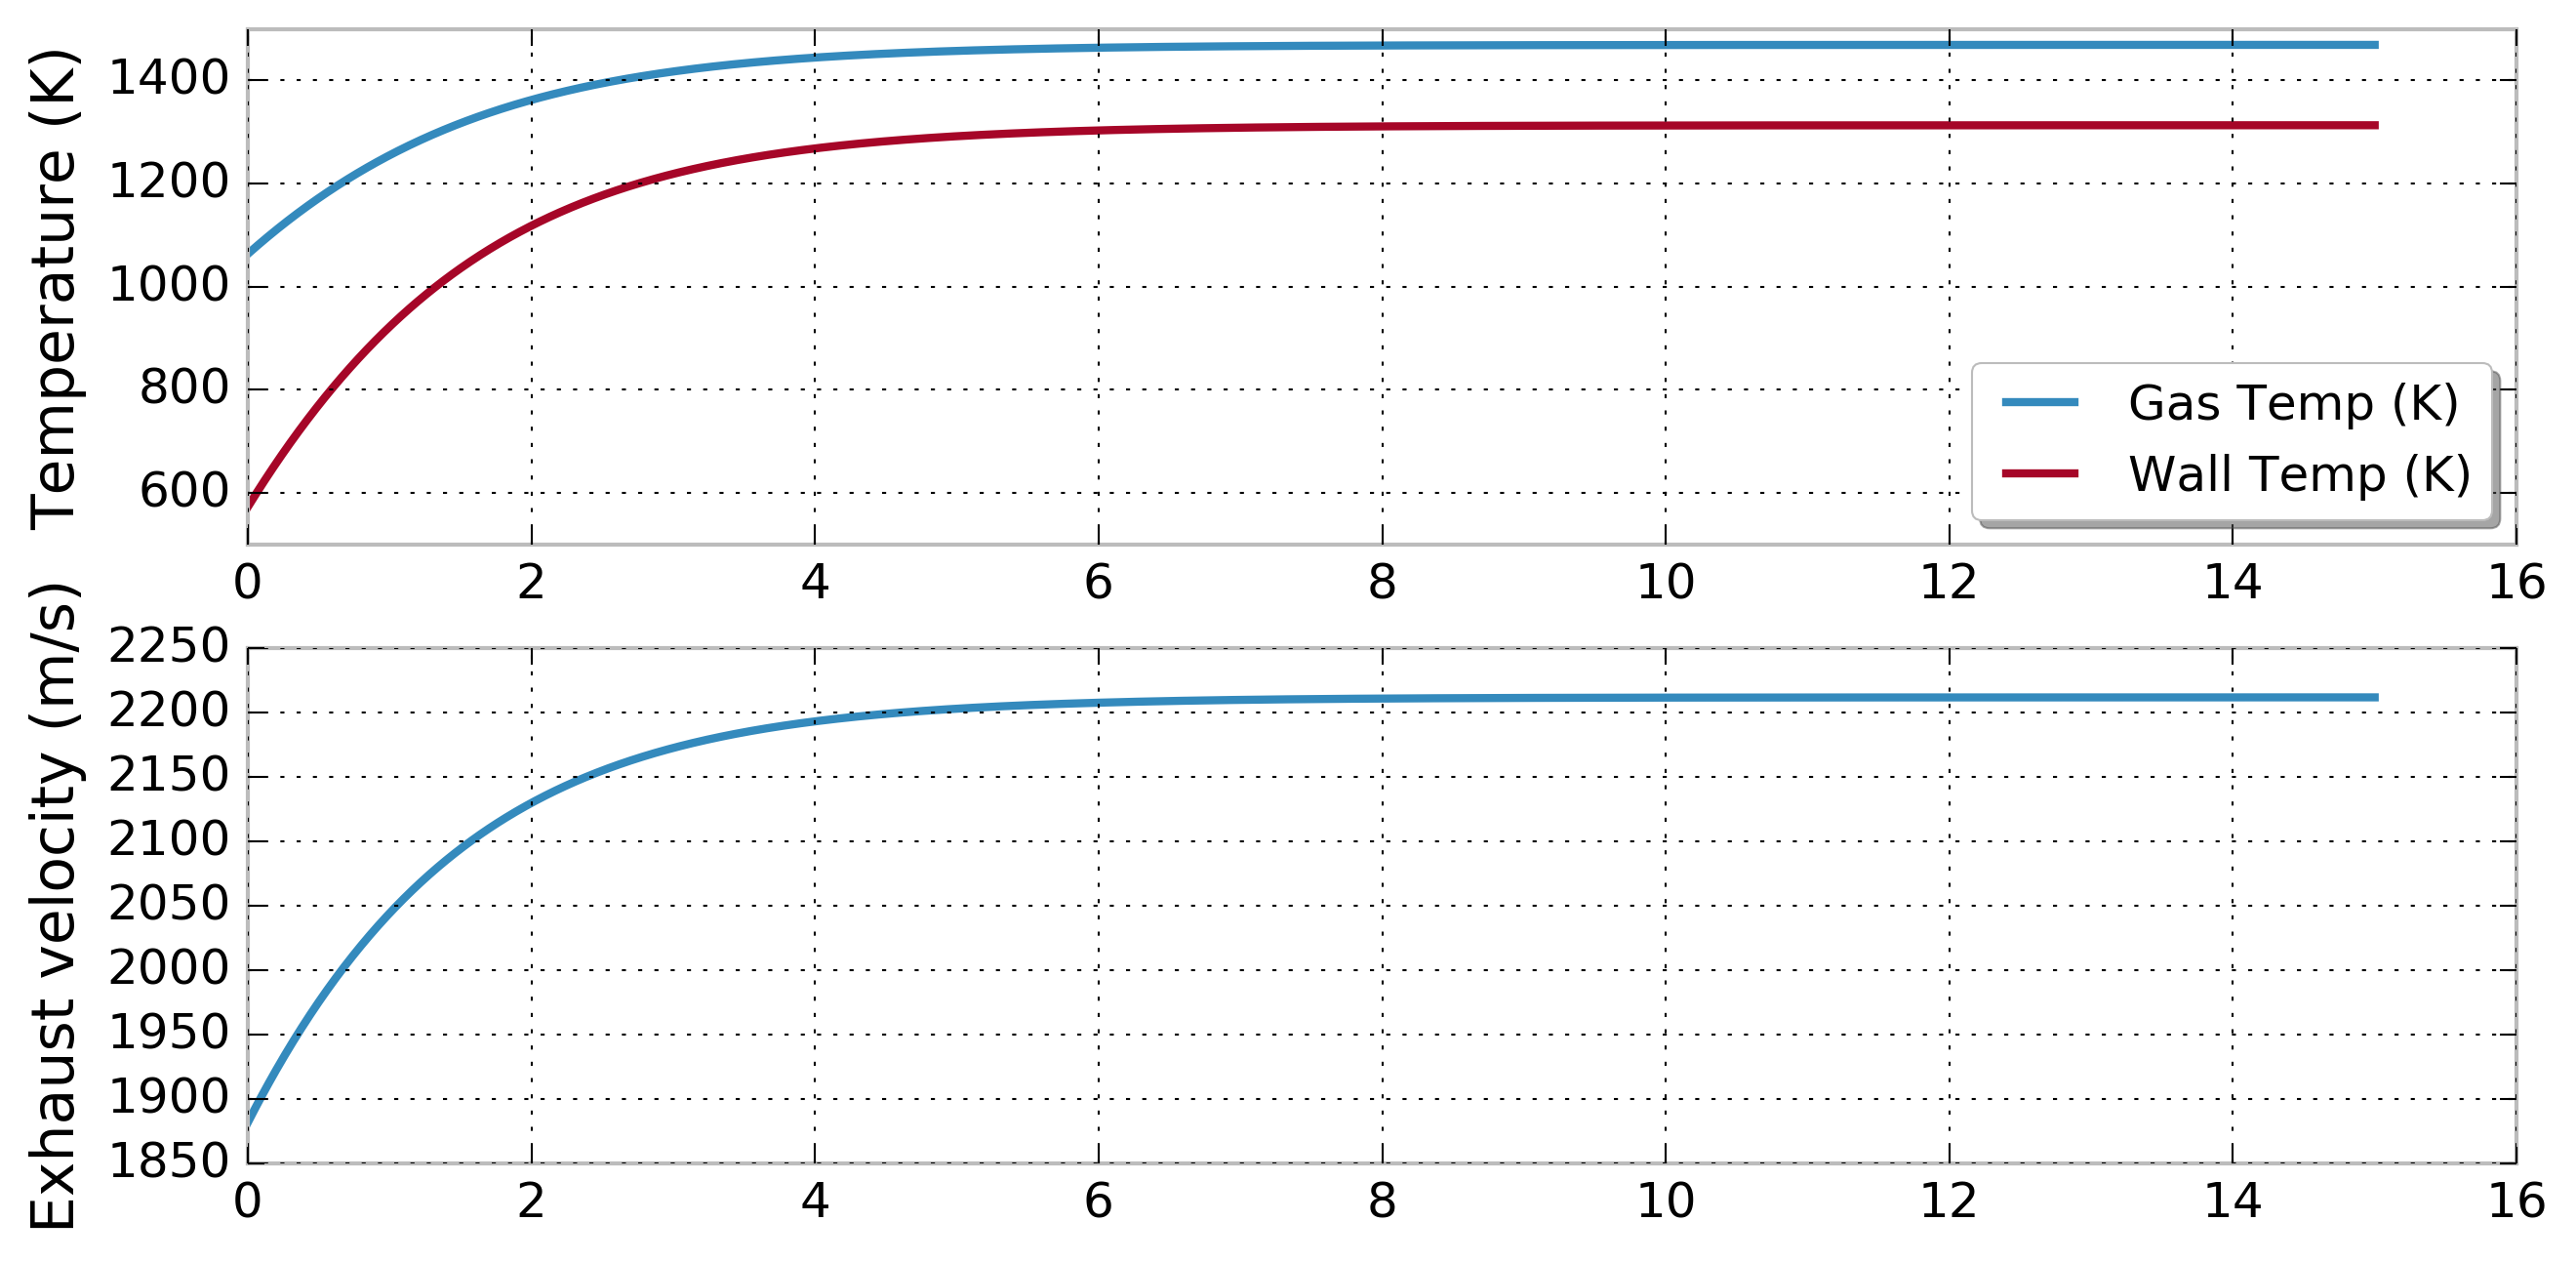

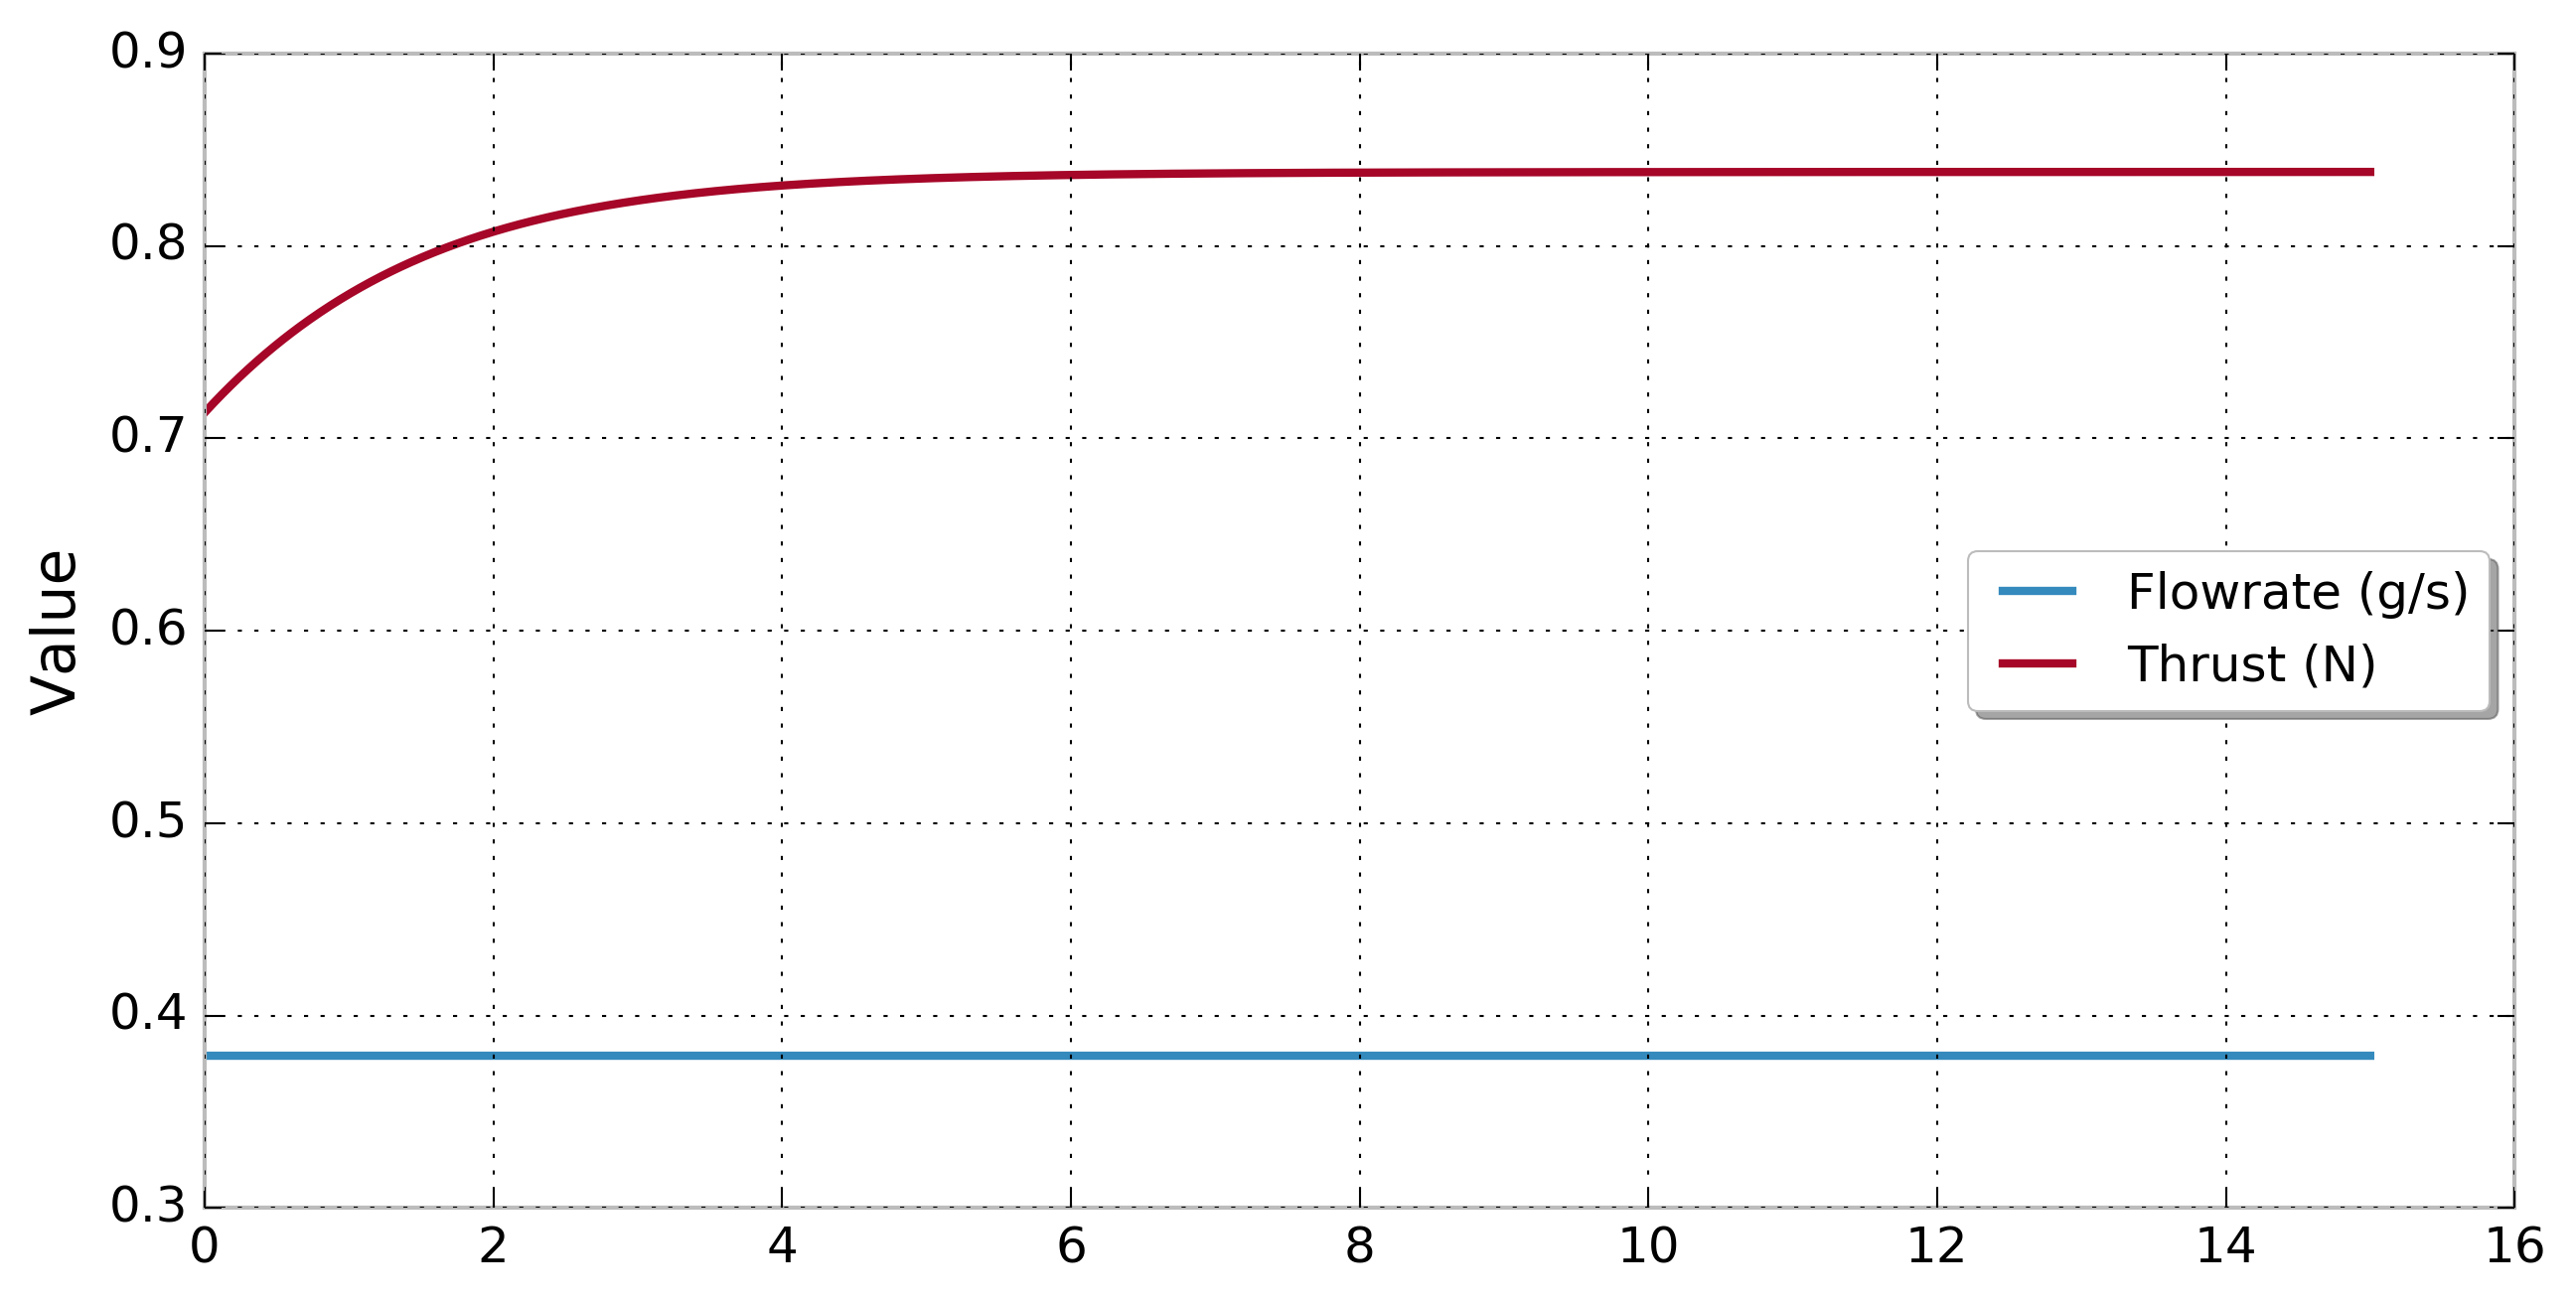

In [7]:
# Pressure and Pulse train duty cycles
Pf = 16.41
DC_v = np.ones([15]) * 1.0

tv, Tw, Tc, mdot_v = temp_dyn(mdot_f(Pf), eta_c=eta_c, DC=DC_v)
cstar_t = cstar_f(Tc, gamma, Mw)
c_t = cstar_t * cf
ax = plt.subplot(211)
ax.plot(tv, Tc, label='Gas Temp (K)')
ax.plot(tv, Tw, label='Wall Temp (K)')
ax.set_ylabel('Temperature (K)')
ax.legend(loc='best', fancybox=True, shadow=True)

ax1 = plt.subplot(212, sharex=ax)
ax1.plot(tv, c_t)
ax1.set_ylabel('Exhaust velocity (m/s)')

plt.figure()
plt.plot(tv, mdot_v * 1e3, label='Flowrate (g/s)')
plt.plot(tv, mdot_v * c_t, label='Thrust (N)')
plt.ylabel('Value')
plt.legend(loc='best', fancybox=True, shadow=True)
Isp_f = c_t[-1]/9.8
Isp_mean = np.mean(c_t)/9.8
print "Reduction in Isp - %.3f" % (Isp_mean/Isp_f*100)

Reduction in Isp - 94.535


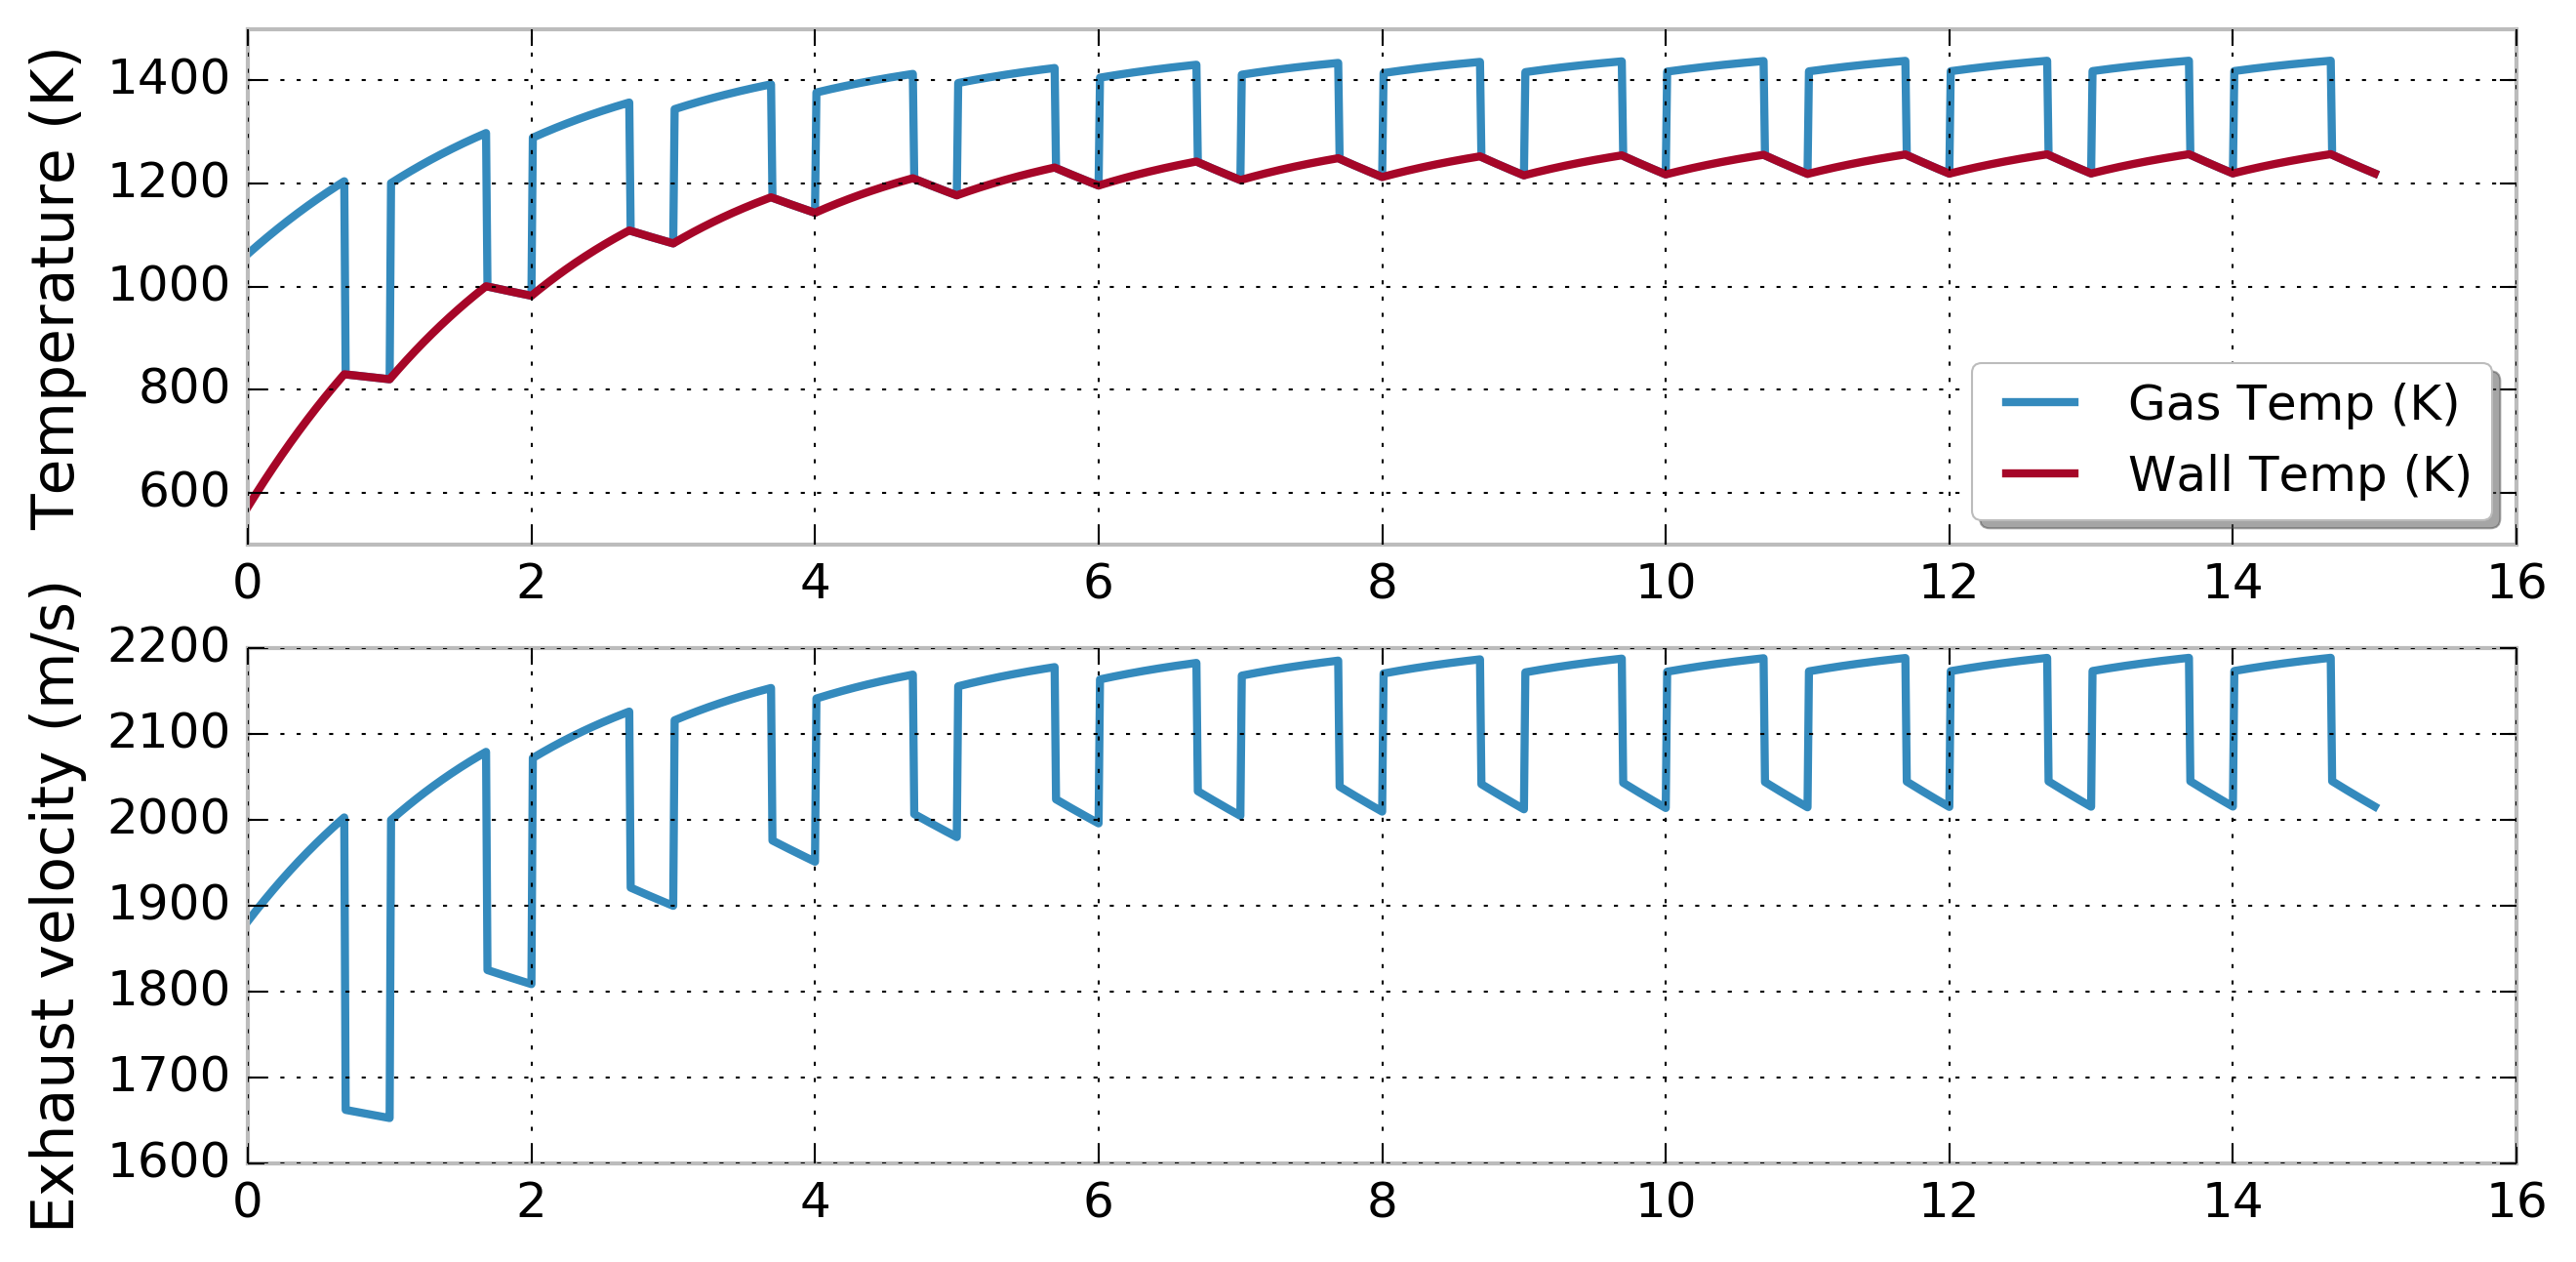

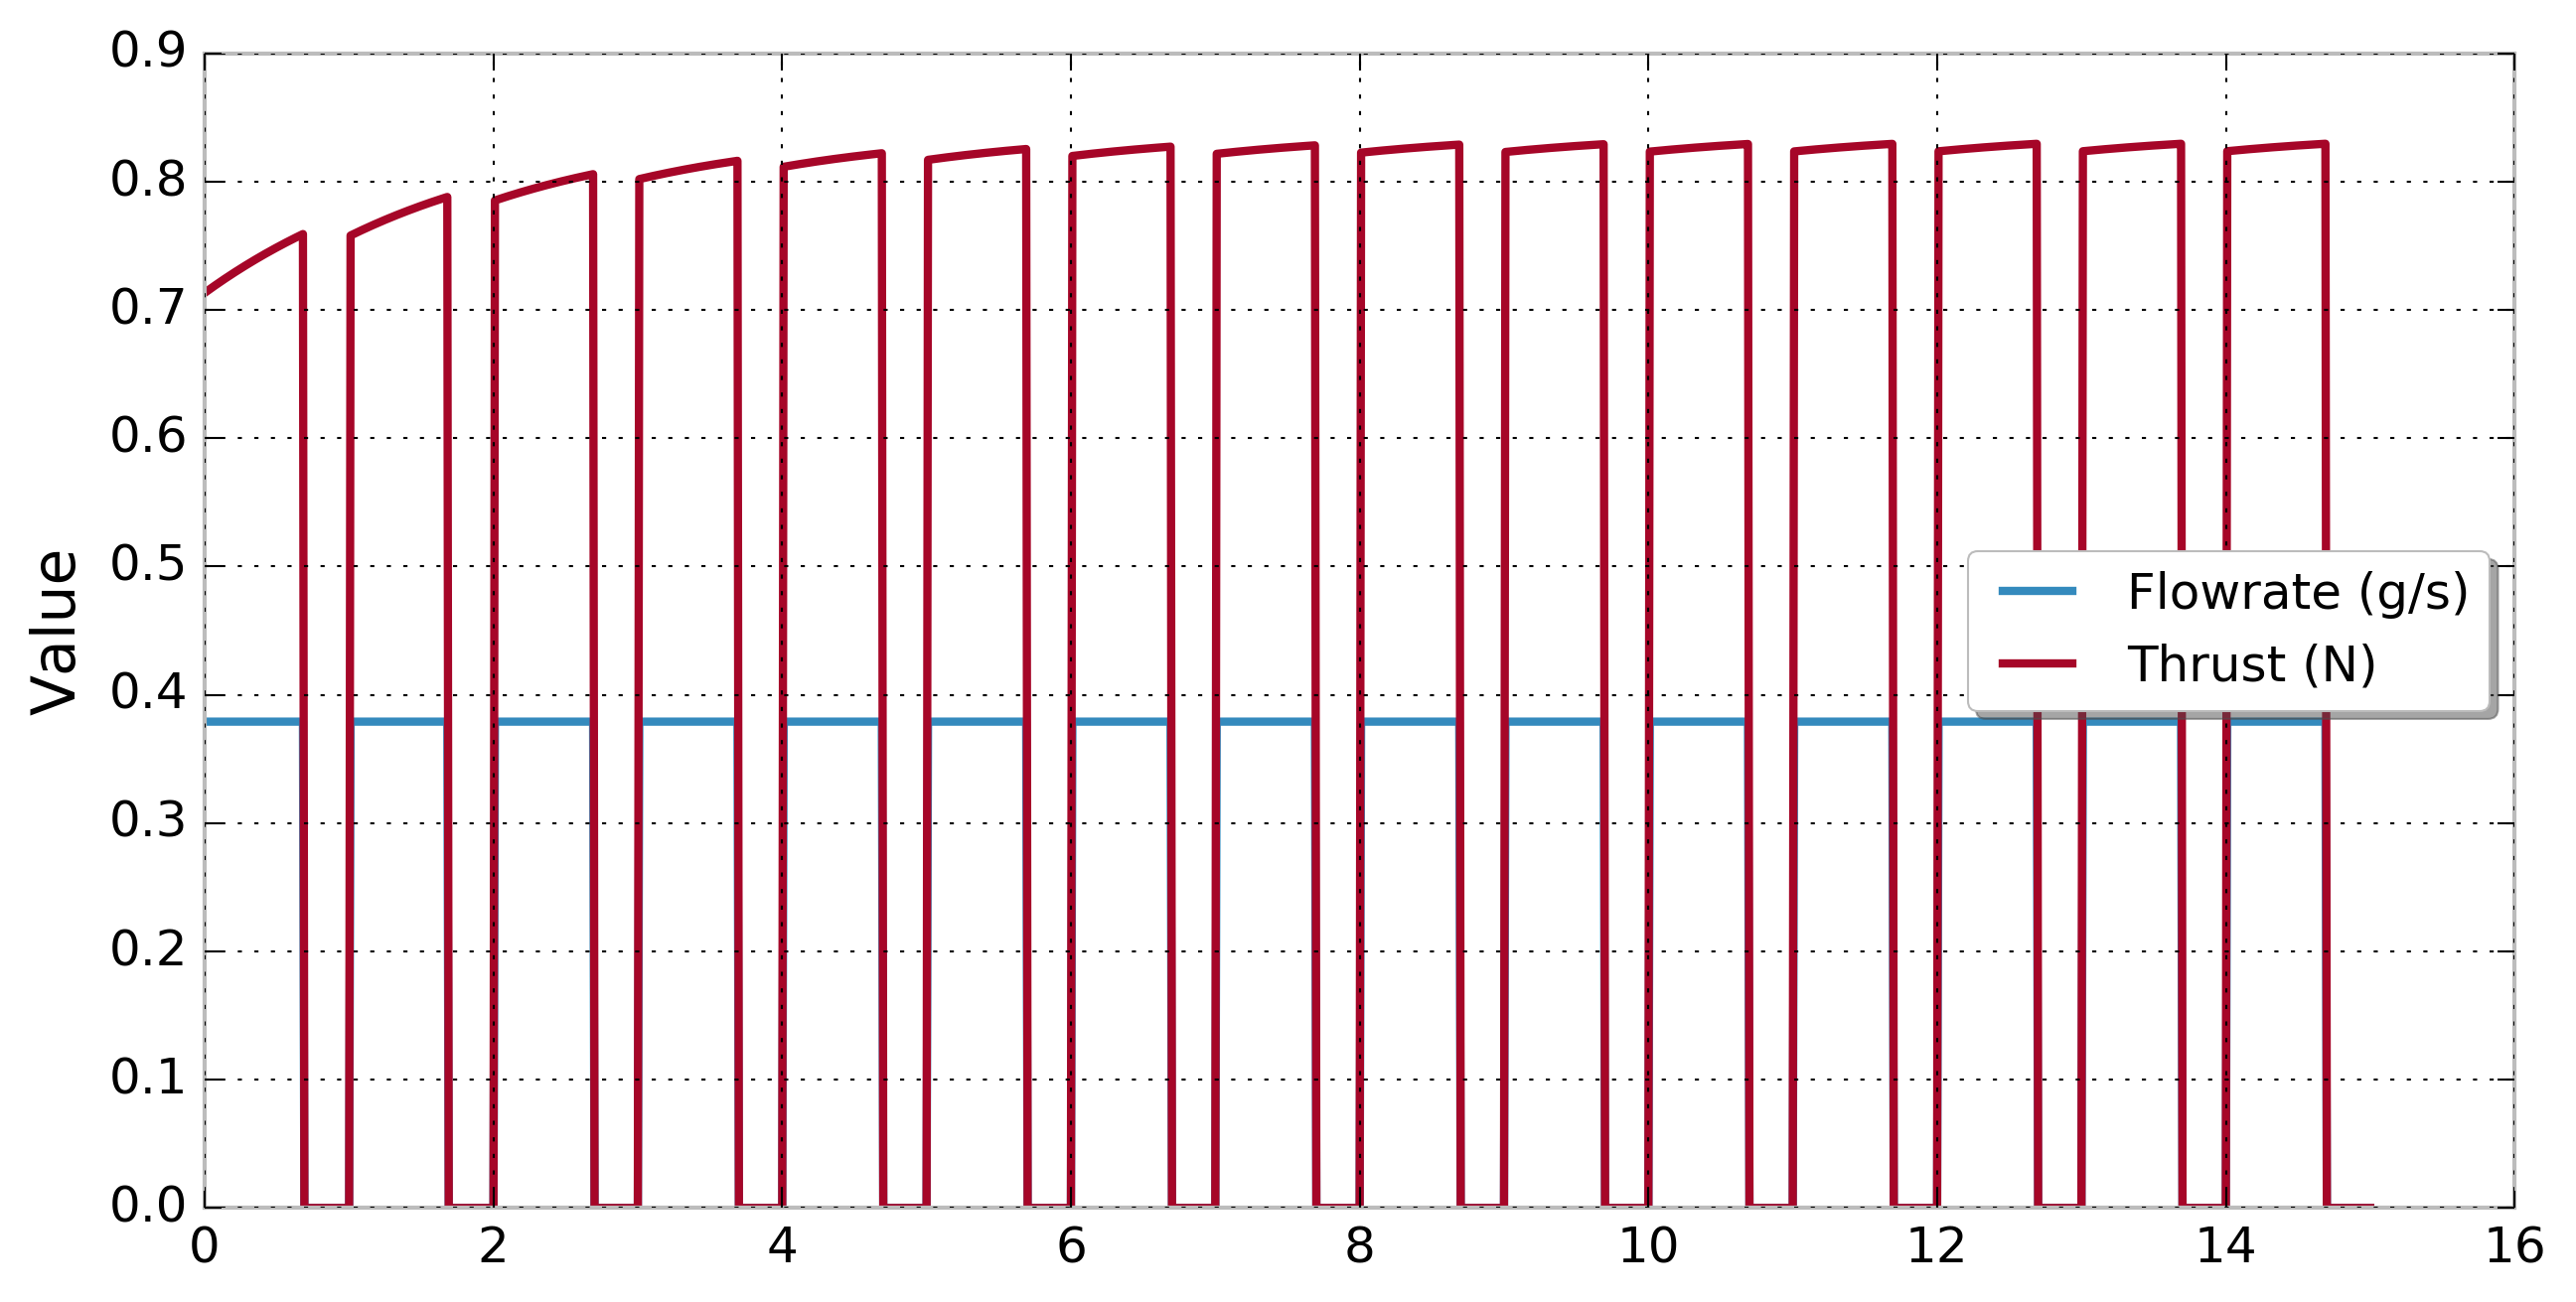

In [8]:
# Pressure and Pulse train duty cycles
Pf = 16.41
DC_v = np.ones([15]) * 0.68

tv, Tw, Tc, mdot_v = temp_dyn(mdot_f(Pf), eta_c=eta_c, DC=DC_v)
cstar_t = cstar_f(Tc, gamma, Mw)
c_t = cstar_t * cf
ax = plt.subplot(211)
ax.plot(tv, Tc, label='Gas Temp (K)')
ax.plot(tv, Tw, label='Wall Temp (K)')
ax.set_ylabel('Temperature (K)')
ax.legend(loc='best', fancybox=True, shadow=True)

ax1 = plt.subplot(212, sharex=ax)
ax1.plot(tv, c_t)
ax1.set_ylabel('Exhaust velocity (m/s)')

plt.figure()
plt.plot(tv, mdot_v * 1e3, label='Flowrate (g/s)')
plt.plot(tv, mdot_v * c_t, label='Thrust (N)')
plt.ylabel('Value')
plt.legend(loc='best', fancybox=True, shadow=True)
print "Reduction in Isp - %.3f" % (np.mean(c_t)/9.8/Isp_f*100)

## Quasi-steady state parameters
Looking at the plots above, it is clear that the thermal time constant of the thrusters is large compared with 1 Hz pulse rate, $\tau_T >> 1 \: \text{s}$  We can therefore define a quasi-steady state condition as the mean of some thruster parameters ($T_c$, $c^*$) over a time scale longer than the pulse time.

The simplest way to approach this is to look at the equations we derived above in the limit of pulse-time going to 0.  In that case, we can define

$$\overline{\dot{m}}(P_{f}) \equiv D\dot{m}(P_{f})$$

where $D$ is duty cycle.  We also say that, in the quasi-steady state, $\dot{T}_w = 0$.  Therefore, we can simplify the energy balance from earlier to

$$hA_{w}\left(T_c-T_{w}\right) = \sigma \epsilon A_{w} (T_{w}^4 - T_\infty^4)$$

or

$$T_c = \frac{\sigma \epsilon A_{w} (T_{w}^4 - T_\infty^4)}{hA_{w}} + T_{w}$$

and

$$T_c = \frac{\overline{\dot{m}}\Delta h_{rxn} + hA_{w}T_{w} + \overline{\dot{m}}\overline{C}_p T_0}{\overline{\dot{m}}\overline{C}_p + hA_{w}}$$

Combined together, we get:

$$\frac{\overline{\dot{m}}\Delta h_{rxn} + hA_{w}T_{w} + \overline{\dot{m}}\overline{C}_p T_0}{\overline{\dot{m}}\overline{C}_p + hA_{w}} - \frac{\sigma \epsilon A_{w} (T_{w}^4 - T_\infty^4)}{hA_{w}} - T_{w}= 0$$

from which we can solve for $T_w$ and then for $T_c$.

No longer a differential equation, it is still non-linear in $T_c$ so will require a numerical solution.  A simple method function to do so, as well as the result it produces is given below.  

In [9]:
from scipy.optimize import brentq

def Tc_qss(mdot_avg, eta_c=eta_c):
    '''
    Computes quasi-static combustion temperature, Tc,
    given average propellant mass flowrate.  Note that
    this function assumes all the other necessary constants
    have been defined as global constants
    '''
    del_h_rxn = eta_c * Cp * (Tci - 273)
    Tw_v = np.empty_like(mdot_avg)    
    
    def resid_f(Tw, md):
        return (md * del_h_rxn + h * Ac * Tw + md * Cp * T0) / (md * Cp + h * Ac) - \
                (sigma * epsilon_f(Tw) * Ac * (Tw**4 - Tinf**4) + h * Ac * Tw) / (h * Ac)
    
    def Tc_qss(Tw_v):
        return (sigma * epsilon_f(Tw_v) * Ac * (Tw_v**4 - Tinf**4)) / (h * Ac) + Tw_v
    
    for i, md in enumerate(mdot_avg):
        Tw_v[i] = brentq(resid_f, 2, 1800, args=(md))
    Tc_v = Tc_qss(Tw_v)
    return Tc_v, Tw_v

Let's look at some results:

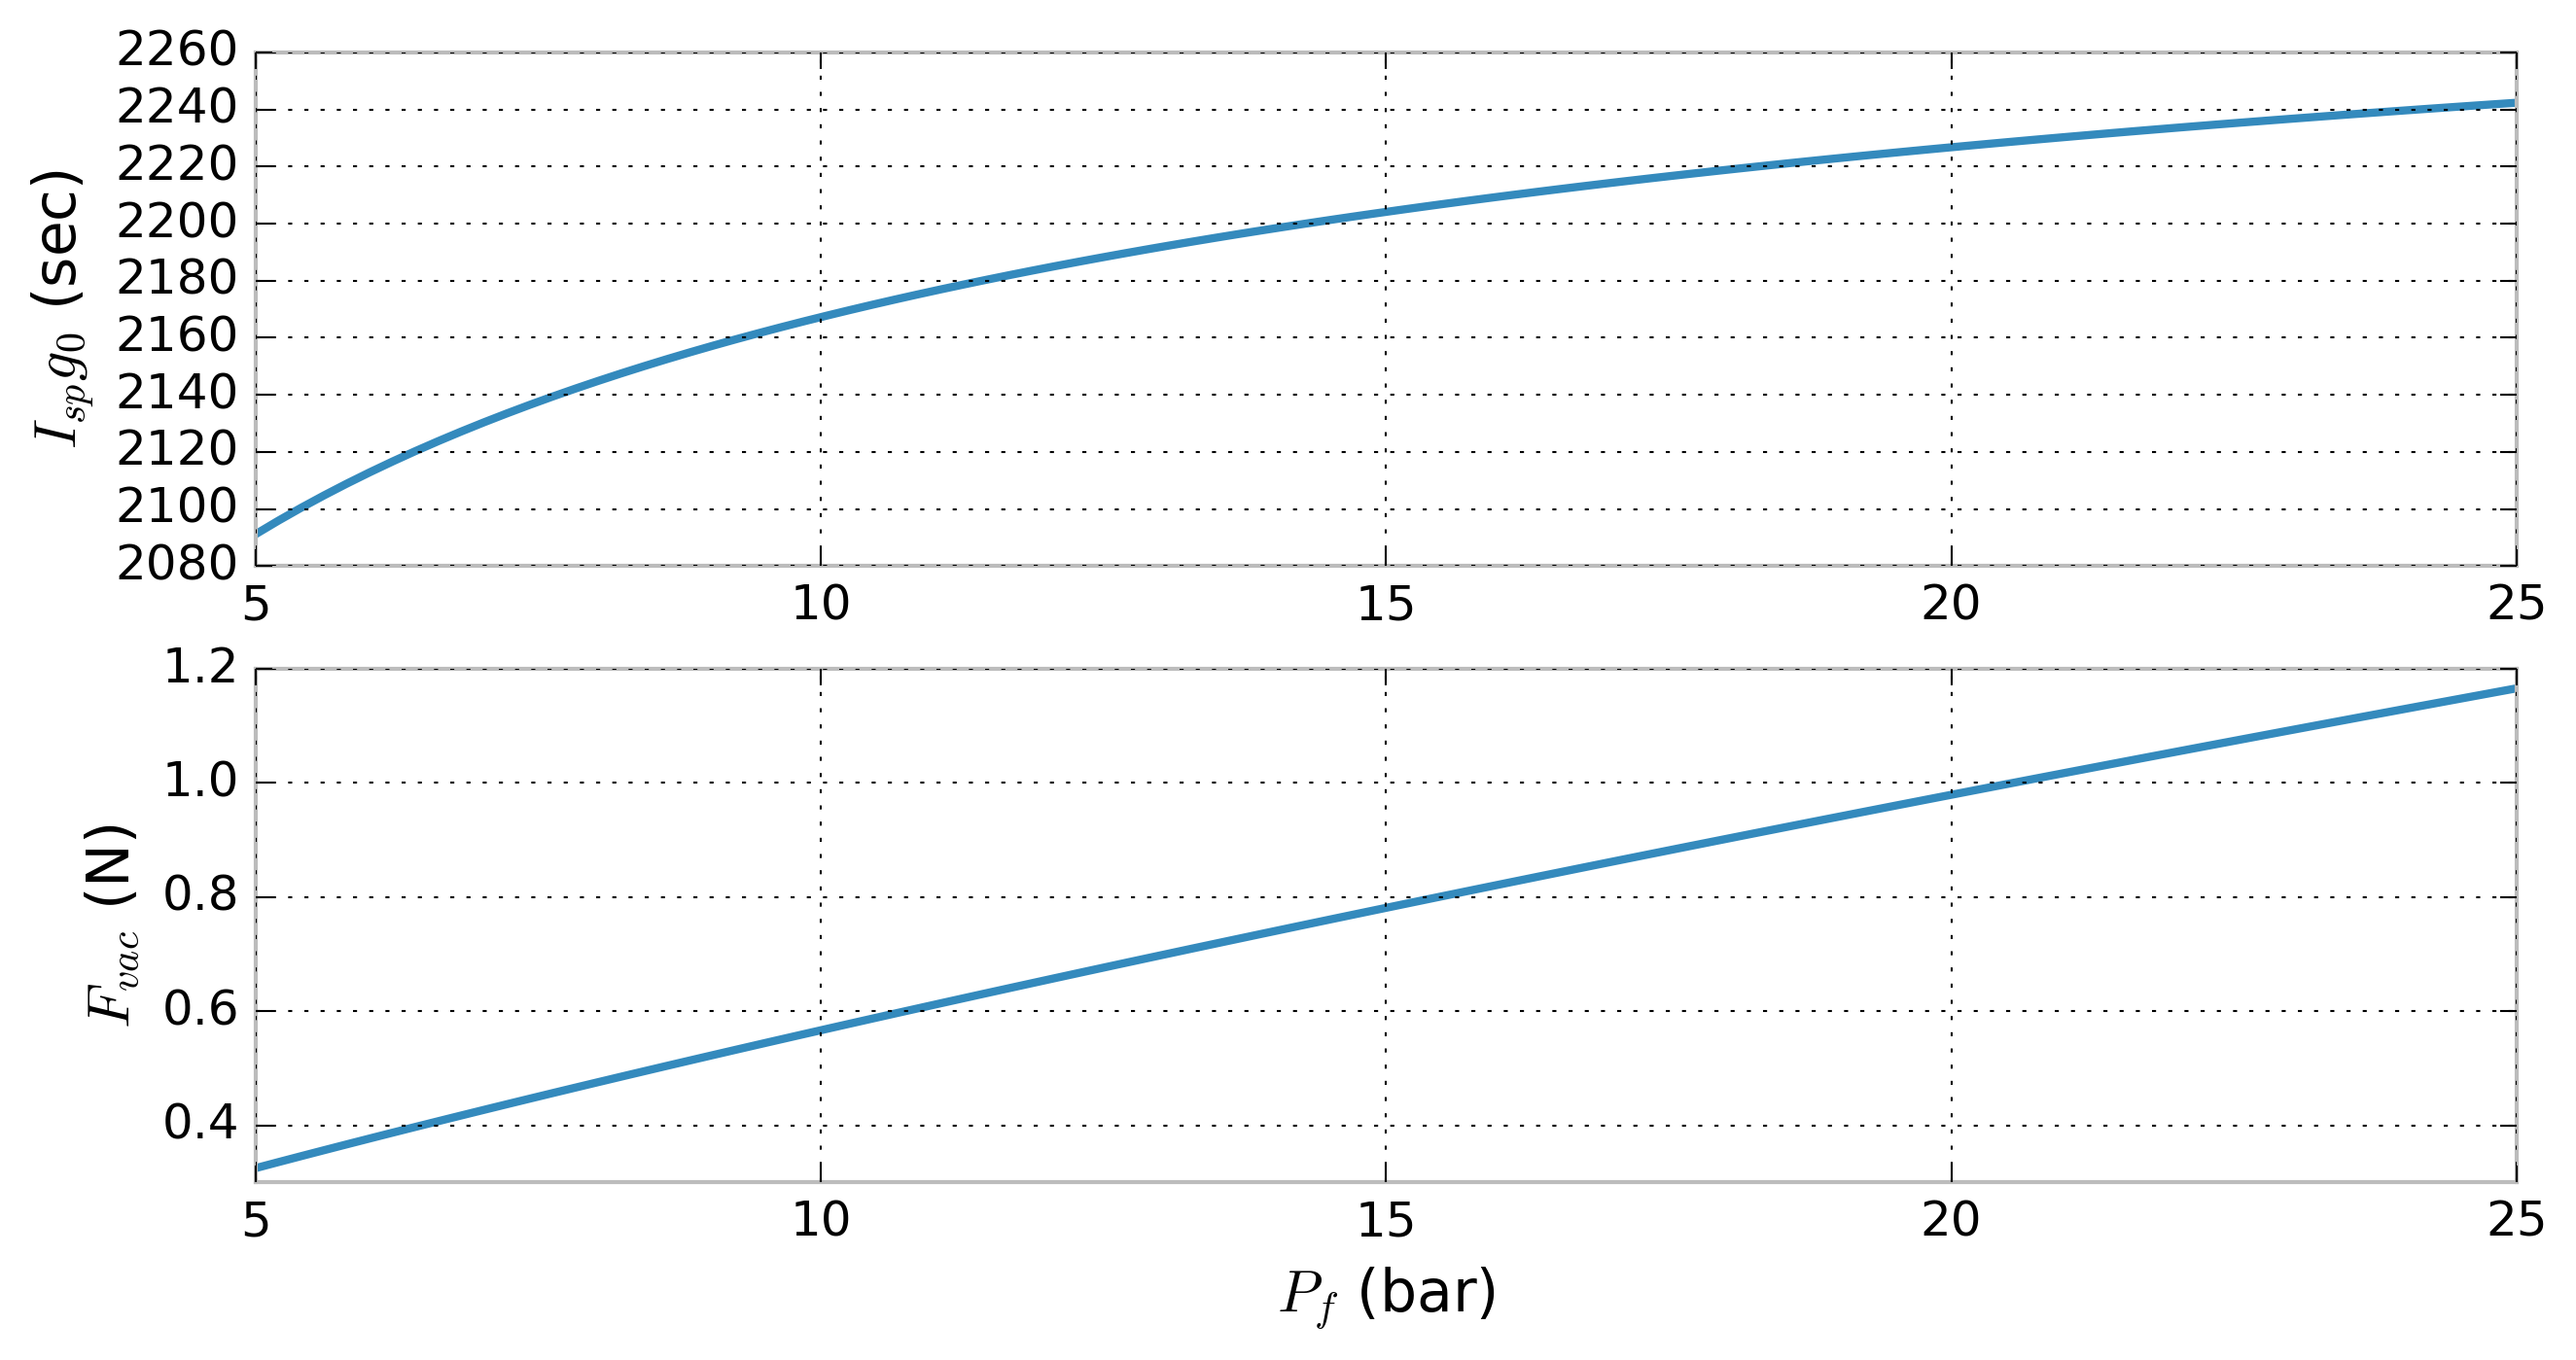

In [13]:
Tc_v, Tw_v = Tc_qss(mdot_theory)
cstar_v = cstar_f(Tc_v, gamma, Mw)
c_v = cstar_v * cf

ax=plt.subplot(211)
ax.plot(Pfeed, c_v, label='Model')
# for i in xrange(4):
#     ax.plot(Pf_data, [Cvac_data[0][i], Cvac_data[1][i]], 'o')
# ax.plot(Pfeed, C(Pfeed), 'r--', label='Curve fit')
plt.ylabel('$I_{sp}g_0$ (sec)')

ax1 = plt.subplot(212, sharex=ax)
ax1.plot(Pfeed, c_v * mdot_theory, label='Model')
# for i in xrange(4):
#     ax1.plot(Pf_data, [Fvac_data[0][i], Fvac_data[1][i]], 'o')
# ax1.plot(Pfeed, Fvac(Pfeed), 'r--', label='Curve fit')
plt.ylabel('$F_{vac}$ (N)')
plt.xlabel('$P_{f}$ (bar)')

In [14]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

Populating the interactive namespace from numpy and matplotlib


/Users/jonny/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['gamma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
